In [1]:
import sys
sys.path.insert(1, '../')
from test_func.common_func import manual

import matplotlib.pyplot as plt
import time

%matplotlib inline

In [ ]:
# naive Krylov output
h_dims = range(10, 1000, 100)
ktimes_slepck = []
for dim in h_dims:
    kstart = time.time()
    manual(5, dim)
    kend = time.time()

    ktime = kend-kstart
    ktimes_slepck.append(ktime)

iter   |   total error  |    grads_l2   


--------------------------------------------------------------------------
There are not enough slots available in the system to satisfy the 8
slots that were requested by the application:

  /Users/sdinh/miniconda3/envs/qoc/bin/python

Either request fewer slots for your application, or make more slots
available for use.

A "slot" is the Open MPI term for an allocatable unit where we can
launch a process.  The number of slots available are defined by the
environment in which Open MPI processes are run:

  1. Hostfile, via "slots=N" clauses (N defaults to number of
     processor cores if not provided)
  2. The --host command line parameter, via a ":N" suffix on the
     hostname (N defaults to 1 if not provided)
  3. Resource manager (e.g., SLURM, PBS/Torque, LSF, etc.)
  4. If none of a hostfile, the --host command line parameter, or an
     RM is present, Open MPI defaults to the number of processor cores

In all the above cases, if you want Open MPI to default to the number
of hard

In [11]:
adtimes = [0.12549805641174316, 0.3137378692626953, 1.0548009872436523, 2.440361976623535, 5.16273307800293, 8.718554973602295, 13.897977113723755, 18.615697145462036, 27.014513731002808, 42.077934980392456]
ktimes_old = [0.1898491382598877, 0.5633950233459473, 0.6736938953399658, 0.6977560520172119, 0.8792262077331543, 0.8070337772369385, 1.0527050495147705, 1.2177798748016357, 1.209434986114502, 1.2146077156066895]
ktimes_new = [0.2308180332183838, 0.5363681316375732, 0.6581361293792725, 0.6247711181640625, 0.6761720180511475, 0.7147650718688965, 0.7632489204406738, 0.8393259048461914, 0.8628678321838379, 0.9217147827148438]
ktimes_scipy = [0.13176989555358887, 0.13581418991088867, 0.12553811073303223, 0.1103360652923584, 0.11827301979064941, 0.1321089267730713, 0.12587904930114746, 0.16336393356323242, 0.16615009307861328, 0.12619781494140625]
ktimes_slepc = [0.21921825408935547, 0.5228598117828369, 0.6119430065155029, 0.6396839618682861, 0.6399848461151123, 0.709069013595581, 0.7246878147125244, 0.7953321933746338, 0.858288049697876, 0.8788716793060303]

[0.21921825408935547, 0.5228598117828369, 0.6119430065155029, 0.6396839618682861, 0.6399848461151123, 0.709069013595581, 0.7246878147125244, 0.7953321933746338, 0.858288049697876, 0.8788716793060303]


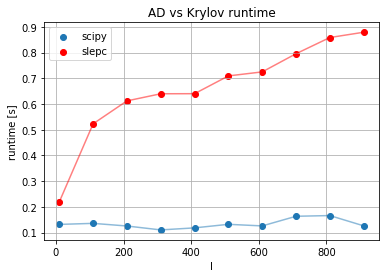

In [14]:
plt.scatter(h_dims, ktimes_scipy, color='C0', label="scipy")
plt.plot(h_dims, ktimes_scipy, color='C0', alpha = 0.5)

plt.scatter(h_dims, ktimes_slepc, color='r', label="slepc")
plt.plot(h_dims, ktimes_slepc, color='r', alpha = 0.5)

plt.xlabel("l")
plt.ylabel("runtime [s]")

plt.title("AD vs Krylov runtime")
plt.grid()
plt.legend()

plt.show()